In [1]:
# Run this block and make sure it is successful.
import numpy as np  # used for handling mathematical operations easier in python
import tensorflow as tf  # used for creating and training machine learning models 
from tensorflow import keras # Keras contains the mnist dataset
from matplotlib import pyplot as plt  # library that helps us visualize data by creating plots 
import seaborn as sn # visualization library for creating more complex graphs

In [2]:

#TODO: Add the split data line here
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

The plot represents the number 5


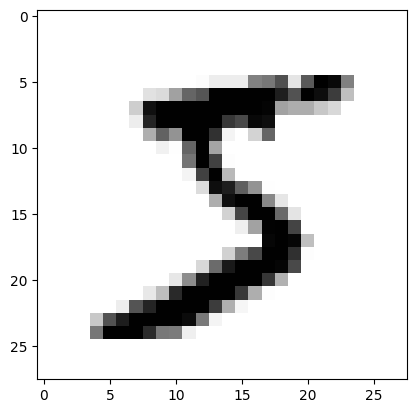

In [3]:
def plotImage(index,x_train,x_test,y_train):
    # Normalize the values so they are a decimal between 0 and 1
    x_train = x_train/255
    x_test = x_test/255
    print(f'The plot represents the number {y_train[index]}')
    plt.imshow(x_train[index],cmap = plt.cm.binary )
    plt.show()


#TODO: change the index to see other values in the dataset
plotImage(0,x_train,x_test,y_train)

In [4]:
# TODO: Add reshape the data in this code block

x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

In [5]:
# Model creation
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784,),activation='relu'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(32, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

c:\Users\speed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# TODO: Train the model using model.fit here 
model.fit(x_train_flat,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9074 - loss: 0.3273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9189 - loss: 0.2849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9215 - loss: 0.2706
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9230 - loss: 0.2620
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9221 - loss: 0.2624


In [8]:
# TODO: Test the model against the test data using model.evaluate
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9209 - loss: 0.2644


[0.2340562492609024, 0.9307000041007996]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


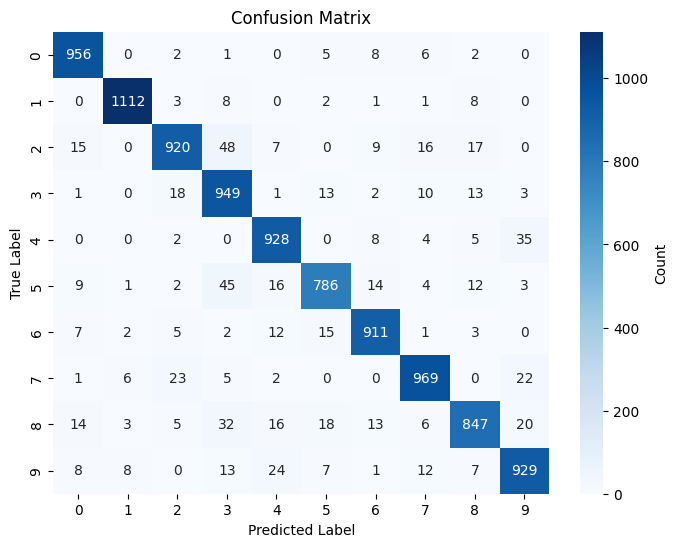

In [9]:
# TODO: Run the confusion matrix
def plot_confusion_matrix(model, x_test_flat, y_test):
    # Make predictions
    y_pred = model.predict(x_test_flat)
    y_pred_labels = [np.argmax(i) for i in y_pred]
    # Create confusion matrix
    confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# TODO: Uncomment out the line below and run the code block
plot_confusion_matrix(model,x_test_flat,y_test)